In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4.1

In [4]:
L = np.random.normal(0, 1, 10000)

In [5]:
xv = np.linspace(-4, 4, len(L))
normal_curve = ( 1/np.sqrt(2* np.pi) ) * np.exp ( -.5*xv **2)

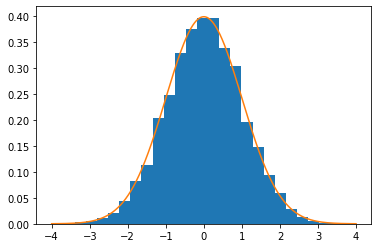

In [6]:
plt.hist(L,bins =25, density=True)
plt.plot(xv , normal_curve)
plt.show()

In [7]:
print(np.var(L))
print(np.mean(L))

0.9903751917797398
0.01529315467683532


# 4.2

In [8]:
def johnson_pdf(x):
    return ( np.sqrt(2) / np.sqrt( np.pi * ( 1 + ( x - 1 ) **2 )) ) * np.exp( -.5 * ( 3 + 2 * np.arcsinh( x-1 )) **2)

In [9]:
def normal_pdf(x, mean, var):
    return ( 1 / np.sqrt(2 * np.pi * var) ) * np.exp( ( -1 / ( 2 * var ) ) * ( (x - mean) **2 ) )


In [55]:
L = 10000
mean = -2
var = 4
x = np.random.normal(mean, np.sqrt(var), L) #drawing L samples from proposal = N(mean, var)

#Thought: can we draw a random sample from the normal_pdf function instead of numpy.random.normal ? 

In [56]:
#Calculate weights
w = johnson_pdf(x)/normal_pdf(x, mean, var)

#Normalize, pyplot.plt does this automatically for density = True
#w = w * L/sum(w)

In [61]:
normal_pdf(1, mean, var)

0.06475879783294587

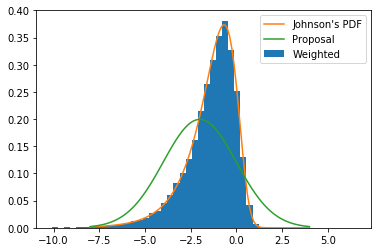

In [57]:
xv = np.linspace( -8 ,4 ,100)

plt.hist(x,weights=w,bins =50, density=True, label= "Weighted")
plt.plot(xv ,johnson_pdf(xv), label="Johnson's PDF")
plt.plot(xv ,normal_pdf(xv, mean, var), label="Proposal")
plt.legend()


plt.show()

In [58]:
# Estimate mean and variance
est_mean = np.sum(x*w)/L
est_var = np.sum(w*( est_mean -x)**2)/L

print(f'estimated mean: {est_mean}, \nestimated variance: {est_var} ')

estimated mean: -1.4040706931055984, 
estimated variance: 1.968282254389301 


In [92]:
def uniform_pdf(x, lbound,rbound):
    val = lbound <= x < rbound
    return val / (rbound - lbound)

In [93]:
L = 10000
lbound = -4
rbound = 1
x = np.random.uniform(lbound, rbound, L) #drawing L samples from proposal = U(lbound, rbound)

In [94]:
#Calculate weights
uniform_pdf_v = np.vectorize(uniform_pdf)
w = johnson_pdf(x)/uniform_pdf_v(x, lbound, rbound)

#Normalize, pyplot.plt does this automatically for density = True
#w = w * L/sum(w)

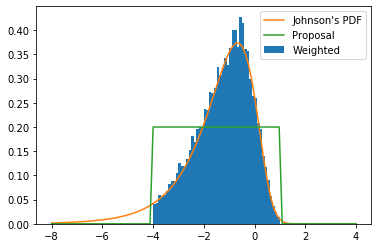

In [95]:
xv = np.linspace( -8 ,4 ,100)

plt.hist(x,weights=w,bins =50, density=True, label= "Weighted")
plt.plot(xv ,johnson_pdf(xv), label="Johnson's PDF")
plt.plot(xv ,uniform_pdf_v(xv, lbound, rbound), label="Proposal")
plt.legend()


plt.show()

We can see that our proposal uniform_pdf = 0 when johnson_pdf > 0, hence it is not valid

# 4.3

In [119]:
from scipy.stats import invgamma, t
#invgamma.rvs(size=L,a=a,scale=b)

In [103]:
a = 2
b = 3
m = 0
l = 1

N = 100
X = np.random.normal(0, 1, N)
y = -X * 3 + np.random.normal(0, 1, N) * 2

In [104]:
print(f'estimated mean of y: {np.mean(y)}\nestimated var of y: {np.var(y)}')

estimated mean of y: 0.3318576810423459
estimated var of y: 11.608301754228277


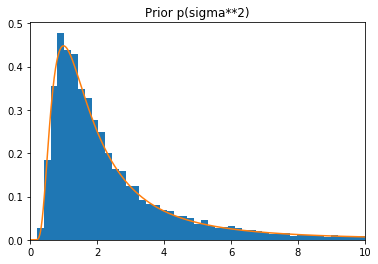

In [111]:
s2v = np.linspace (0 ,10 ,1000)
s2is = invgamma.rvs(size=L,a=a,scale=b)
plt.hist(s2is ,density=True ,bins=np.linspace (0 ,10 ,50))
plt.plot(s2v , invgamma.pdf(x=s2v ,a=a,scale=b))
plt.xlim ((0 ,10))
plt.title('Prior p(sigma**2)')
plt.show ()


In [116]:
wis = np.random.normal(m, np.sqrt(s2is/l), L)
wv = np. linspace ( -5 ,5 ,1000)

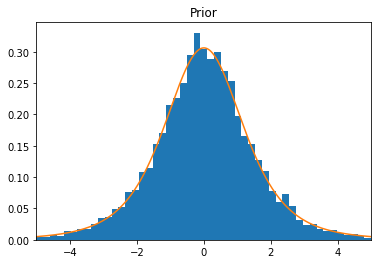

In [120]:
plt.hist(wis ,density=True ,bins=np.linspace (-5,5,50))
plt.plot(wv ,t.pdf(x=wv ,df =2*a,loc=m,scale=np.sqrt(b/(a*l))))
plt.xlim (( -5 ,5))
plt.title('Prior')
plt.show ()

In [121]:
weightis = 1/np.sqrt (2* np.pi*s2is)**N*np.exp ( -1/(2* s2is)*np.sum((X[:,np.newaxis ]* wis[np.newaxis ,:]-y
[:,np.newaxis ])**2, axis =0))

In [123]:
mpost = (m*l+np.sum(X*y))/(l+np.sum(X**2))
lpost = l + np.sum(X**2)
apost = a + N/2
bpost = b+.5*( np.sum(y**2)+m**2*l-(m*l+np.sum(X*y))**2/(l+np.sum(X**2)))


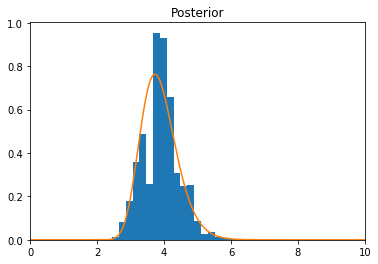

In [124]:
plt.hist(s2is ,density=True ,bins=np.linspace (0 ,10 ,50) ,weights=weightis)
plt.plot(s2v , invgamma.pdf(x=s2v ,a=apost ,scale=bpost))
plt.xlim ((0 ,10))
plt.title('Posterior')
plt.show ()


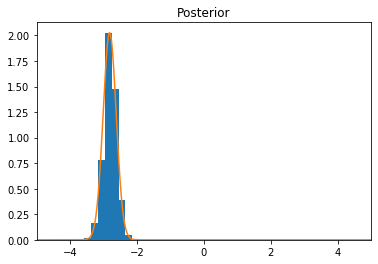

In [125]:

plt.hist(wis ,density=True ,bins=np.linspace (-5,5,50),weights=weightis)
plt.plot(wv ,t.pdf(x=wv ,df =2* apost ,loc=mpost ,scale=np.sqrt(bpost /( lpost*apost))))
plt.xlim (( -5 ,5))
plt.title('Posterior')
plt.show ()

# 4.4

301

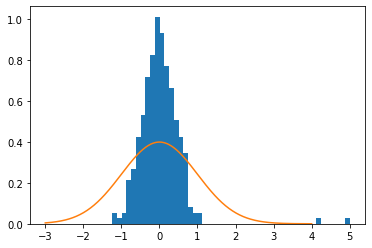

In [24]:
def draw_new(x, i):
    return 0.9*x[i - 1] + np.random.normal(0, np.sqrt(0.19))

x1 = 5

data = np.zeros(300)

data[0] = x1

new_data = [draw_new(data, i) if i != 0 else data[0] for i in range(len(data) + 1) ]

xv = np.linspace(-3, 4, len(new_data))
normal_curve = ( 1/np.sqrt(2* np.pi) ) * np.exp ( (-1/(2) * (xv)**2 ) )

plt.hist(new_data, bins=50, density=True)
plt.plot(xv, normal_curve)

len(new_data)

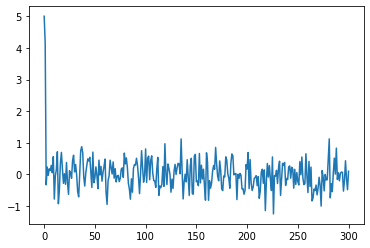

In [26]:
plt.plot(new_data)

In [27]:
print(f'est mean: {np.mean(new_data)}\nest var {np.var(new_data)}')

est mean: 0.01814763911815161
est var 0.31400268014111576


In [54]:
def a_prob(A):
    if A == 1:
        return 0.1
    else: 
        return 0.9

def b_prob(B):
    if B == 1:
        return 0.16
    else:
        return 0.84

def b_prob_on_a(A, B):
    if B == 1:
        if A == 1:
            return 0.7
        else:
            return 0.1
    else:
        if A == 1:
            return 0.3
        else:
            return 0.9

def b_prob_on_a_2(A):
    if A == 1:
        return 0.7
    else:
        return 0.1

L = 300
A0 = 1
B0 = 1

p_a = 0.1
p_b = 0.16

A = np.zeros(L)
B = np.zeros(L)

A[0] = A0
B[0] = B0

for i in range(1, L):
    #1
    a = np.random.binomial(1, (b_prob_on_a( A[i - 1], B[i - 1] ) * p_a) / b_prob(B[i - 1]) )
    #2
    b = np.random.binomial(1, (b_prob_on_a_2( a ) ) )
    
    A[i] = a
    B[i] = b


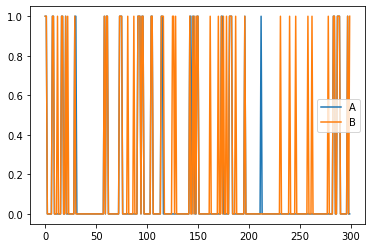

In [55]:
plt.plot(A, label='A')
plt.plot(B, label='B')
plt.legend(loc="best")
plt.show()

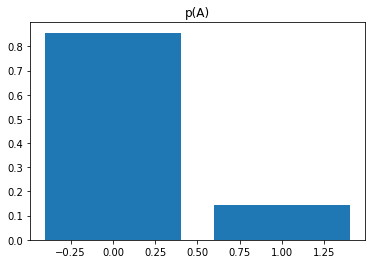

In [57]:
plt.bar(x=(0,1),height=(sum(1-A)/L,sum(A)/L))
plt.title('p(A)')
plt.show()

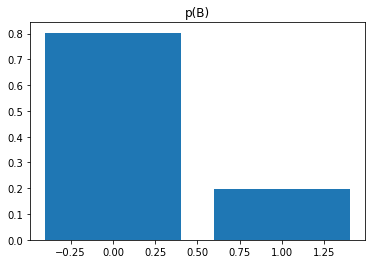

In [58]:
plt.bar(x=(0,1),height=(sum(1-B)/L,sum(B)/L))
plt.title('p(B)')
plt.show()